In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [3]:
register_matplotlib_converters()
%matplotlib notebook

### import askhi

In [4]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_askhi07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_askhi = pd.read_csv(StringIO(csv_string))
df_askhi.index = df_askhi['Unnamed: 0']
df_askhi = df_askhi.drop('Unnamed: 0', axis=1)
df_askhi.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_askhi = df_askhi.T
df_askhi.index = pd.to_datetime(df_askhi.index)
print(df_askhi.shape)
df_askhi.head(2)

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,17.78,30.25,46.25,45.69,32.76,52.50,45.98,48.88,18.41,48.70,...,31.31,24.29,54.34,51.450,38.52,52.3,78.27,29.17,31.97,56.95
2007-01-04,17.87,29.97,46.32,45.21,32.09,52.76,46.53,48.70,18.17,48.57,...,31.57,24.22,53.00,49.839,38.49,53.2,78.03,26.60,31.63,56.50


### import bidlo

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_bidlo07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_bidlo = pd.read_csv(StringIO(csv_string))
df_bidlo.index = df_bidlo['Unnamed: 0']
df_bidlo = df_bidlo.drop('Unnamed: 0', axis=1)
df_bidlo.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_bidlo = df_bidlo.T
df_bidlo.index = pd.to_datetime(df_bidlo.index)
print(df_bidlo.shape)
df_bidlo.head(2)

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,17.1,29.40,45.03,44.88,31.82,51.150,44.57,48.28,17.65,48.12,...,29.30,23.70,52.32,48.791,38.1,47.20,75.78,28.21,31.10,52.26
2007-01-04,17.3,29.44,45.57,44.38,31.40,51.552,44.94,48.25,17.73,48.05,...,30.46,23.85,52.05,49.000,38.0,46.52,76.39,25.10,30.83,51.35


### import price

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_price07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_price = pd.read_csv(StringIO(csv_string))
df_price.index = df_price['Unnamed: 0']
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_price = df_price.T
df_price.index = pd.to_datetime(df_price.index)
print(df_price.shape)
df_price.head(2)

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,17.51,29.86,45.75,45.10,32.06,51.57,45.2,48.58,18.15,48.39,...,30.49,24.09,52.57,49.55,38.40,50.63,78.02,29.140,31.60,56.41
2007-01-04,17.68,29.81,46.15,45.08,31.88,52.66,46.5,48.60,18.02,48.31,...,31.21,24.09,52.91,49.23,38.22,50.09,76.55,25.493,31.33,55.38


In [7]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_spread07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_spread = pd.read_csv(StringIO(csv_string))
df_spread.index = df_spread['Unnamed: 0']
df_spread = df_spread.drop('Unnamed: 0', axis=1)
df_spread.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_spread = df_spread.T
df_spread.index = pd.to_datetime(df_spread.index)
print(df_spread.shape)
df_spread.head(2)

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.68,0.85,1.22,0.81,0.94,1.350,1.41,0.60,0.76,0.58,...,2.01,0.59,2.02,2.659,0.42,5.10,2.49,0.96,0.87,4.69
2007-01-04,0.57,0.53,0.75,0.83,0.69,1.208,1.59,0.45,0.44,0.52,...,1.11,0.37,0.95,0.839,0.49,6.68,1.64,1.50,0.80,5.15


### Proportion of the price relative to the highest Ask price of the day

In [8]:
df_price_askhi = df_price/df_askhi
df_price_askhi.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.984814,0.987107,0.989189,0.987087,0.978632,0.982286,0.983036,0.993863,0.985877,0.993634,...,0.973810,0.991766,0.967427,0.963071,0.996885,0.968069,0.996806,0.998972,0.988427,0.990518
2007-01-04,0.989368,0.994661,0.996330,0.997125,0.993456,0.998105,0.999355,0.997947,0.991745,0.994647,...,0.988597,0.994633,0.998302,0.987781,0.992985,0.941541,0.981033,0.958383,0.990515,0.980177
2007-01-05,0.993243,0.996303,0.993100,0.989803,0.998432,0.992621,0.980587,0.993617,0.992853,0.985924,...,0.984331,0.983360,0.990575,0.991390,0.989581,0.990229,0.993334,0.979535,0.984395,0.987787
2007-01-08,0.996096,0.994352,0.997660,0.997114,0.998128,0.996589,0.987789,0.997945,0.993936,0.995812,...,0.994961,0.986400,0.996822,0.996137,0.996058,0.983051,0.989221,0.992369,1.000000,0.997331
2007-01-09,0.991101,0.992710,0.990534,0.998015,0.976839,0.993783,0.997360,0.995495,0.997250,0.996449,...,0.990706,0.998058,0.987441,0.997347,0.996593,0.992674,0.981688,0.991182,0.986275,0.983621


### Proportion of the askhi price that the spread consisted of

In [9]:
df_spread_askhi = df_spread/df_askhi
df_spread_askhi.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.038245,0.028099,0.026378,0.017728,0.028694,0.025714,0.030666,0.012275,0.041282,0.011910,...,0.064197,0.024290,0.037173,0.051681,0.010903,0.097514,0.031813,0.032911,0.027213,0.082353
2007-01-04,0.031897,0.017684,0.016192,0.018359,0.021502,0.022896,0.034172,0.009240,0.024216,0.010706,...,0.035160,0.015277,0.017925,0.016834,0.012731,0.125564,0.021018,0.056391,0.025292,0.091150
2007-01-05,0.018018,0.010084,0.010565,0.018178,0.016311,0.014191,0.027179,0.008236,0.016493,0.020493,...,0.028518,0.056260,0.021112,0.020090,0.016150,0.076570,0.014900,0.034109,0.020064,0.094828
2007-01-08,0.026776,0.018937,0.029143,0.016426,0.022777,0.017245,0.016136,0.013561,0.018743,0.009003,...,0.029606,0.036400,0.023743,0.023993,0.016032,0.086562,0.025195,0.013253,0.015459,0.096085
2007-01-09,0.018354,0.014911,0.014514,0.014560,0.025039,0.015448,0.015398,0.007577,0.015402,0.011072,...,0.021066,0.060583,0.017245,0.016327,0.009172,0.072650,0.025974,0.014028,0.018832,0.095836


### Proportion of Spread 'in favor' of the seller (the company)

# WHENEVER PERFORMING DIVISION ADD A LITTLE BIT TO TOP AND TO THE BOTTOM

In [10]:
### proportion of spread ""
df_pbs = ((df_price-df_bidlo+1e-70)/df_spread)
df_pbs.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.602941,0.541176,0.590164,0.271605,0.255319,0.311111,0.446809,0.500000,0.657895,0.465517,...,0.592040,0.661017,0.123762,0.285446,0.714286,0.672549,0.899598,0.968750,0.574713,0.884861
2007-01-04,0.666667,0.698113,0.773333,0.843373,0.695652,0.917219,0.981132,0.777778,0.659091,0.500000,...,0.675676,0.648649,0.905263,0.274136,0.448980,0.534431,0.097561,0.262000,0.625000,0.782524
2007-01-05,0.625000,0.633333,0.346939,0.439024,0.903846,0.480000,0.285714,0.225000,0.566667,0.313131,...,0.450549,0.704225,0.553571,0.571429,0.354839,0.872396,0.552632,0.400000,0.222222,0.871212
2007-01-08,0.854197,0.701754,0.919708,0.824324,0.917808,0.802198,0.243243,0.848485,0.676471,0.534884,...,0.829787,0.626374,0.866142,0.838983,0.754098,0.804196,0.572165,0.424242,1.000000,0.972222
2007-01-09,0.515152,0.511111,0.347826,0.863636,0.075000,0.597561,0.828571,0.405405,0.821429,0.679245,...,0.558824,0.967949,0.271739,0.837500,0.628571,0.899160,0.295000,0.371429,0.271186,0.829091


In [11]:
# df_pbs.isnull().sum().sum()

### import returns

In [12]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_returns = df_returns.T
df_returns.index = pd.to_datetime(df_returns.index)
print(df_returns.shape)
df_returns.head(2)

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.021587,0.000000,0.045236,-0.003095,0.003129,-0.016215,-0.006593,0.006839,0.013400,0.006657,...,0.040614,0.00375,-0.021589,-0.017839,-0.004149,-0.034884,0.020670,0.002408,0.013470,0.013462
2007-01-04,0.009709,-0.001675,0.008743,-0.000443,-0.005615,0.021136,0.028761,0.000412,-0.007162,-0.001653,...,0.023614,0.00000,0.006468,-0.006458,-0.004688,-0.010666,-0.005844,-0.114437,-0.008544,-0.018259


### Generate Dates

In [13]:
dates = df_price.index
companies = df_price.columns

In [14]:
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

DatetimeIndex(['2008-10-15', '2008-12-01', '2008-10-09', '2008-09-29',
               '2011-08-08'],
              dtype='datetime64[ns]', freq=None)

### Check the pairsiwe correlations (3 per company)

In [15]:
### Subdivide into the 

In [16]:
# #sup_title_font =15
# sub_title_font =10
# legend_font =8
# axis_font = 10
# tick_rotation = 20
# black_dot = 2
# red_dot = 5

# ### matrix of subplots
# n_cols = 3
# n_rows = 2
# n_plots = 16
# nloops = int(np.floor(388/n_plots))
# #temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

# for i in range(nloops):
#     nn = len(df_price.columns)
#     lower = i*n_plots
#     upper = (i+1)*n_plots
#     #print(lower, upper)
#     temp_list = df_price.columns[lower:upper]
#     print('\n\n\n\n\n\n\n\nBatch {}'.format(i))

#     for symbol in temp_list:
#         #symbol = 'ORCL_ORACLE CORP'

#         temp_cor1 = round(np.corrcoef(df_price_askhi[symbol], df_spread_askhi[symbol])[0][1], 4)
#         temp_cor2 = round(np.corrcoef(df_price_askhi[symbol], df_pbs[symbol])[0][1], 4)
#         temp_cor3 = round(np.corrcoef(df_spread_askhi[symbol], df_pbs[symbol])[0][1], 4)

#         ##--WITH THE RETURNS--#
#         temp_cor4 = round(np.corrcoef(df_returns[symbol], df_price_askhi[symbol])[0][1], 4)
#         temp_cor5 = round(np.corrcoef(df_returns[symbol], df_spread_askhi[symbol])[0][1], 4)
#         temp_cor6 = round(np.corrcoef(df_returns[symbol], df_pbs[symbol])[0][1], 4)


#         corr_list = [temp_cor1, temp_cor2, temp_cor3, temp_cor4, temp_cor5, temp_cor6]
#         color_list = []

#         for corr_value in corr_list:
#             temp_value = np.abs(corr_value)
#             if temp_value <= 0.4:
#                 color_list.append('blue')
#             elif temp_value <= 0.7: 
#                 color_list.append('yellow')
#             else:
#                 color_list.append('red')


#         ##---#########----BEGIN PLOTTING---#########--##
# #         fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(n_rows,n_cols, figsize=(12,8))
#         fig, (ax1, ax2, ax3) = plt.subplots(n_rows,n_cols, figsize=(12,8))
#         ###-----PRICE/ASKHI ~~ SPREAD/ASKHI SCATTER--------#####
#         ax1.scatter(df_price_askhi[symbol], df_spread_askhi[symbol], color = color_list[0])
#         ax1.set_title('Price/Askhi ~ Spread/Askhi:\nCorr:{}'.format(temp_cor1), fontsize = title_font)
#         ax1.set_xlabel('Price/Askhi', fontsize=axis_font)
#         ax1.set_ylabel('Spread/Askhi', fontsize=axis_font)
#         ax1.spines['top'].set_visible(False)
#         ax1.spines['right'].set_visible(False)


#         ###-----PRICE/ASKHI ~~ (PRICE-BIDLO)/ASKHI SCATTER--------#####
#         ax2.scatter(df_price_askhi[symbol], df_pbs[symbol], color = color_list[1])
#         ax2.set_title('Price/Askhi ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor2), fontsize = title_font)
#         ax2.set_xlabel('Price/Askhi', fontsize=axis_font)
#         ax2.set_ylabel('Bottm Spread/Spread', fontsize=axis_font)
#         ax2.spines['top'].set_visible(False)
#         ax2.spines['right'].set_visible(False)


#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
# #         ax3.scatter(df_spread_askhi[symbol], df_pbs[symbol], color = color_list[2])
# #         ax3.set_title('Spread/Askhi ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor3), fontsize = title_font)
# #         ax3.set_xlabel('Spread/Askhi', fontsize=axis_font)
# #         ax3.set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
# #         ax3.spines['top'].set_visible(False)
# #         ax3.spines['right'].set_visible(False)


#         #####
#         ##########--------CORRELATE WITH RETURNS---------##############
#         ##########


#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
#         ax4.scatter(df_returns[symbol], df_price_askhi[symbol], color = color_list[3])
#         ax4.set_title('Returns ~ Price/Askhi:\nCorr:{}'.format(temp_cor4), fontsize = title_font)
#         ax4.set_xlabel('Returns', fontsize=axis_font)
#         ax4.set_ylabel('Price/Askhi', fontsize=axis_font)
#         ax4.spines['top'].set_visible(False)
#         ax4.spines['right'].set_visible(False)


#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
# #         ax5.scatter(df_returns[symbol], df_spread_askhi[symbol], color = color_list[4])
# #         ax5.set_title('Returns ~ Spread/Askhi:\nCorr:{}'.format(temp_cor5), fontsize = title_font)
# #         ax5.set_xlabel('Returns', fontsize=axis_font)
# #         ax5.set_ylabel('Spread/Askhi', fontsize=axis_font)
# #         ax5.spines['top'].set_visible(False)
# #         ax5.spines['right'].set_visible(False)

#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
#         ax6.scatter(df_returns[symbol], df_pbs[symbol], color = color_list[5])
#         ax6.set_title('Returns ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor6), fontsize = title_font)
#         ax6.set_xlabel('Returns', fontsize=axis_font)
#         ax6.set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
#         ax6.spines['top'].set_visible(False)
#         ax6.spines['right'].set_visible(False)

#         fig.subplots_adjust(hspace=0.7, top=5)
#         fig.suptitle('{}'.format(symbol), verticalalignment='top')
#         ### left, bottom, right, top proportions
#         fig.tight_layout(rect=[0, 0.1, 1.0, 0.95])
#         plt.show()
#         break

# REMOVE PLOTS 3 AND 5 FOR EACH STOCK

In [17]:
# #sup_title_font =15
# sub_title_font =10
# legend_font =8
# axis_font = 10
# tick_rotation = 20
# black_dot = 2
# red_dot = 5

# ### matrix of subplots
# n_cols = 2
# n_rows = 1
# n_plots = 16
# nloops = int(np.floor(388/n_plots))
# #temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

# for i in range(nloops):
#     nn = len(df_price.columns)
#     lower = i*n_plots
#     upper = (i+1)*n_plots
#     #print(lower, upper)
#     temp_list = df_price.columns[lower:upper]
#     print('\n\nBatch {}'.format(i))

#     for symbol in temp_list:
#         #symbol = 'ORCL_ORACLE CORP'

#         temp_cor1 = round(np.corrcoef(df_price_askhi[symbol], df_spread_askhi[symbol])[0][1], 4)
#         temp_cor2 = round(np.corrcoef(df_price_askhi[symbol], df_pbs[symbol])[0][1], 4)

#         ##--WITH THE RETURNS--#
#         temp_cor4 = round(np.corrcoef(df_returns[symbol], np.log(df_price_askhi[symbol]))[0][1], 4)
#         temp_cor6 = round(np.corrcoef(df_returns[symbol], df_pbs[symbol])[0][1], 4)


#         corr_list = [temp_cor1, temp_cor2, temp_cor3, temp_cor4, temp_cor5, temp_cor6]
#         color_list = []

#         for corr_value in corr_list:
#             temp_value = np.abs(corr_value)
#             if temp_value <= 0.4:
#                 color_list.append('blue')
#             elif temp_value <= 0.7: 
#                 color_list.append('yellow')
#             else:
#                 color_list.append('red')


#         ##---#########----BEGIN PLOTTING---#########--##
# #         fig, ((ax1, ax2), (ax4,ax6)) = plt.subplots(n_rows,n_cols, figsize=(8,8))
#         fig, (ax4,ax6) = plt.subplots(n_rows,n_cols, figsize=(8,4))        
#         ###-----PRICE/ASKHI ~~ SPREAD/ASKHI SCATTER--------#####
# #         ax1.scatter(df_price_askhi[symbol], df_spread_askhi[symbol], color = color_list[0])
# #         ax1.set_title('Price/Askhi ~ Spread/Askhi:\nCorr:{}'.format(temp_cor1), fontsize = title_font)
# #         ax1.set_xlabel('Price/Askhi', fontsize=axis_font)
# #         ax1.set_ylabel('Spread/Askhi', fontsize=axis_font)
# #         ax1.spines['top'].set_visible(False)
# #         ax1.spines['right'].set_visible(False)


# #         ###-----PRICE/ASKHI ~~ (PRICE-BIDLO)/ASKHI SCATTER--------#####
# #         ax2.scatter(df_price_askhi[symbol], df_pbs[symbol], color = color_list[1])
# #         ax2.set_title('Price/Askhi ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor2), fontsize = title_font)
# #         ax2.set_xlabel('Price/Askhi', fontsize=axis_font)
# #         ax2.set_ylabel('Bottm Spread/Spread', fontsize=axis_font)
# #         ax2.spines['top'].set_visible(False)
# #         ax2.spines['right'].set_visible(False)

#         #####
#         ##########--------CORRELATE WITH RETURNS---------##############
#         #########

#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
#         ax4.scatter(df_returns[symbol], np.log(df_price_askhi[symbol]), color = color_list[3])
#         ax4.set_title('log(Price/Askhi) ~ Returns:\nCorr:{}'.format(temp_cor4), fontsize = title_font)
#         ax4.set_xlabel('Returns', fontsize=axis_font)
#         ax4.set_ylabel('Price/Askhi', fontsize=axis_font)
#         ax4.spines['top'].set_visible(False)
#         ax4.spines['right'].set_visible(False)


#         ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
#         ax6.scatter(df_returns[symbol], df_pbs[symbol], color = color_list[5])
#         ax6.set_title('Bottom Spread/Spread ~ Returns:\nCorr:{}'.format(temp_cor6), fontsize = title_font)
#         ax6.set_xlabel('Returns', fontsize=axis_font)
#         ax6.set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
#         ax6.spines['top'].set_visible(False)
#         ax6.spines['right'].set_visible(False)

#         fig.subplots_adjust(hspace=0.7, top=5)
#         fig.suptitle('{}'.format(symbol), verticalalignment='top')
#         ### left, bottom, right, top proportions
#         fig.tight_layout(rect=[0, 0.1, 1.0, 0.95])
#         plt.show()
#         if i > 3:
#             break

### Try a SIGMOID TRANSFORMATION ON THE 2ND PLOT

In [18]:
#fig, ax = plt.subplots(n_rows, n_cols,figsize=(17,9))

In [19]:
#1/(1+np.exp(-df_returns['ORCL_ORACLE CORP']))

In [26]:
#df_price.columns[0:16]

0 16




Batch 0


<IPython.core.display.Javascript object>


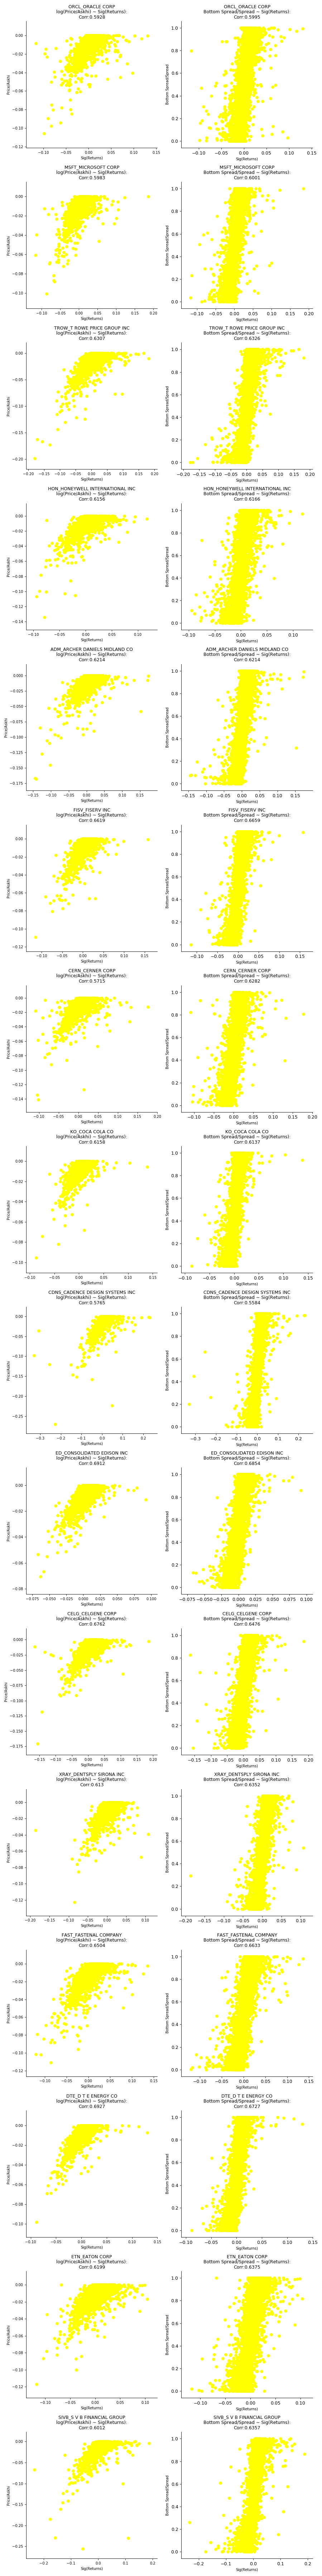

In [126]:
#sup_title_font =15
sub_title_font =10
title_font = 10
legend_font =8
axis_font = 8
tick_rotation = 20
black_dot = 2
red_dot = 5


### matrix of subplots
n_cols = 2
n_rows = 16
#n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_rows))
#temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    lower = i*n_rows
    upper = (i+1)*n_rows
    print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    print('\n\n\n\nBatch {}'.format(i))
      
    #####-----INSTANTIATE PLOTS------######
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(10,80))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for k in range(n_rows):
        symbol = temp_list[k]
        ##--WITH THE RETURNS--#
        sig6 = 1/(1+np.exp(-30*df_returns[symbol]))
        temp_cor4 = round(np.corrcoef(df_returns[symbol], np.log(df_price_askhi[symbol]))[0][1], 4)
        temp_cor6 = round(np.corrcoef(df_returns[symbol], df_pbs[symbol])[0][1], 4)

        corr_list = [temp_cor4, temp_cor6]
        color_list = []

        for corr_value in corr_list:
            temp_value = np.abs(corr_value)
            if temp_value <= 0.4:
                color_list.append('blue')
            elif temp_value <= 0.7: 
                color_list.append('yellow')
            else:
                color_list.append('red')


        ##---#########----BEGIN PLOTTING---#########--##       
        #####
        ##########--------CORRELATE WITH RETURNS---------##############
        #########
        ax[k,0].scatter(df_returns[symbol], np.log(df_price_askhi[symbol]), color = color_list[0])
        ax[k,0].set_title('{}\nlog(Price/Askhi) ~ Sig(Returns):\nCorr:{}'.format(symbol,temp_cor4), fontsize = title_font)
        ax[k,0].set_xlabel('Sig(Returns)', fontsize=axis_font)
        ax[k,0].tick_params(axis="x", labelsize=axis_font)#, rotation=tick_rotation)        
        ax[k,0].set_ylabel('Price/Askhi', fontsize=axis_font)
        ax[k,0].tick_params(axis="y", labelsize=axis_font)
        ax[k,0].spines['top'].set_visible(False)
        ax[k,0].spines['right'].set_visible(False)

        ###-------------#####
        ax[k,1].scatter(df_returns[symbol], df_pbs[symbol], color = color_list[1])
        ax[k,1].set_title('{}\nBottom Spread/Spread ~ Sig(Returns):\nCorr:{}'.format(symbol, temp_cor6), fontsize = title_font)
        ax[k,1].set_xlabel('Sig(Returns)', fontsize=axis_font)
        ax[k,1].set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
        ax[k,1].spines['top'].set_visible(False)
        ax[k,1].spines['right'].set_visible(False)
        #ax[k, 1].text(-0.5, 1.25, symbol, fontsize=title_font, verticalalignment='center', bbox=props)
        
        #fig.suptitle('{}'.format(symbol), verticalalignment='top')
    ### [distance from the top]
    fig.subplots_adjust(hspace=0.7)#, top=0.3)
    ### left, bottom, right, top proportions
#    fig.tight_layout(rect=[0.0, 0.1, 1.0, 0.95])  
    fig.tight_layout()
    plt.show()
    break

### Leftovers

<IPython.core.display.Javascript object>


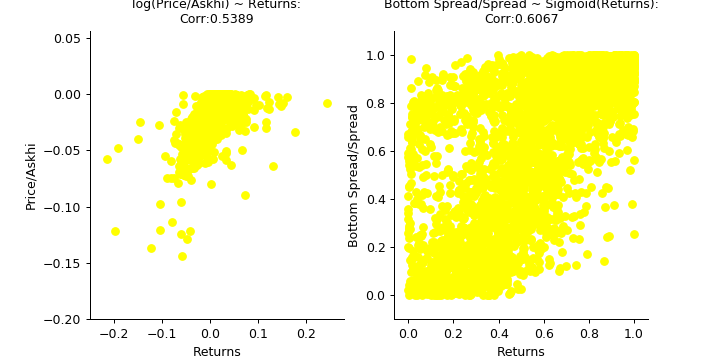

TAP_MOLSON COORS BREWING CO
STZ_CONSTELLATION BRANDS INC
CBS_CBS CORP
CMG_CHIPOTLE MEXICAN GRILL INC


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


In [35]:
### matrix of subplots
n_cols = 2
n_rows = 4
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)


for i in range(nloops):
    temp_list = df_returns.columns[-n_rows:]
    
    #####-----INSTANTIATE PLOTS------######
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(8,4))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for k in range(n_rows):
        symbol = temp_list[k]
        print(symbol)
        ##--WITH THE RETURNS--#
        sig6 = 1/(1+np.exp(-80*df_returns[symbol]))
        temp_cor4 = round(np.corrcoef(df_returns[symbol], np.log(df_price_askhi[symbol]))[0][1], 4)
        temp_cor6 = round(np.corrcoef(sig6, df_pbs[symbol])[0][1], 4)

        corr_list = [temp_cor4, temp_cor6]
        color_list = []

        for corr_value in corr_list:
            temp_value = np.abs(corr_value)
            if temp_value <= 0.4:
                color_list.append('blue')
            elif temp_value <= 0.7: 
                color_list.append('yellow')
            else:
                color_list.append('red')


        ##---#########----BEGIN PLOTTING---#########--##       
        #####
        ##########--------CORRELATE WITH RETURNS---------##############
        #########
        ax[k,0].scatter(df_returns[symbol], np.log(df_price_askhi[symbol]), color = color_list[0])
        ax[k,0].set_title('log(Price/Askhi) ~ Returns:\nCorr:{}'.format(temp_cor4), fontsize = title_font)
        ax[k,0].set_xlabel('Returns', fontsize=axis_font)
        ax[k,0].set_ylabel('Price/Askhi', fontsize=axis_font)
        ax[k,0].spines['top'].set_visible(False)
        ax[k,0].spines['right'].set_visible(False)

        ###-------------#####
        ax[k,1].scatter(sig6, df_pbs[symbol], color = color_list[1])
        ax[k,1].set_title('Bottom Spread/Spread ~ Sigmoid(Returns):\nCorr:{}'.format(temp_cor6), fontsize = title_font)
        ax[k,1].set_xlabel('Returns', fontsize=axis_font)
        ax[k,1].set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
        ax[k,1].spines['top'].set_visible(False)
        ax[k,1].spines['right'].set_visible(False)
        ax[k, 1].text(-0.45, 1.4, symbol, fontsize=14, verticalalignment='center', bbox=props)
        
        #fig.suptitle('{}'.format(symbol), verticalalignment='top')
    
    fig.subplots_adjust(hspace=0.7, top=5)
    ### left, bottom, right, top proportions
    fig.tight_layout(rect=[0, 0.1, 1.0, 0.95])
    plt.show()

In [54]:
# for i in range(32):
#     print(32%16 + i)



Batch 0


<IPython.core.display.Javascript object>


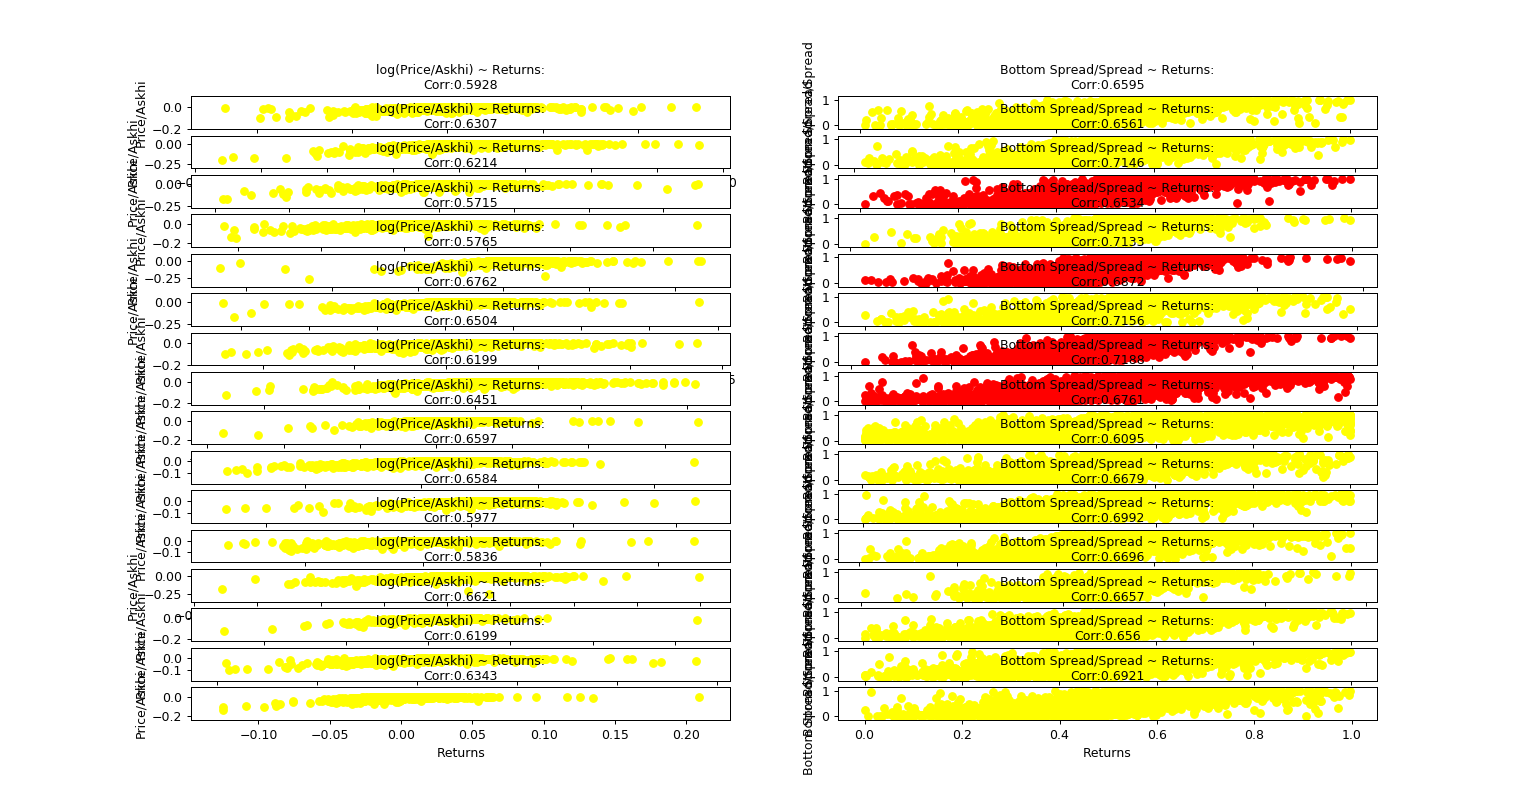



Batch 1


<IPython.core.display.Javascript object>


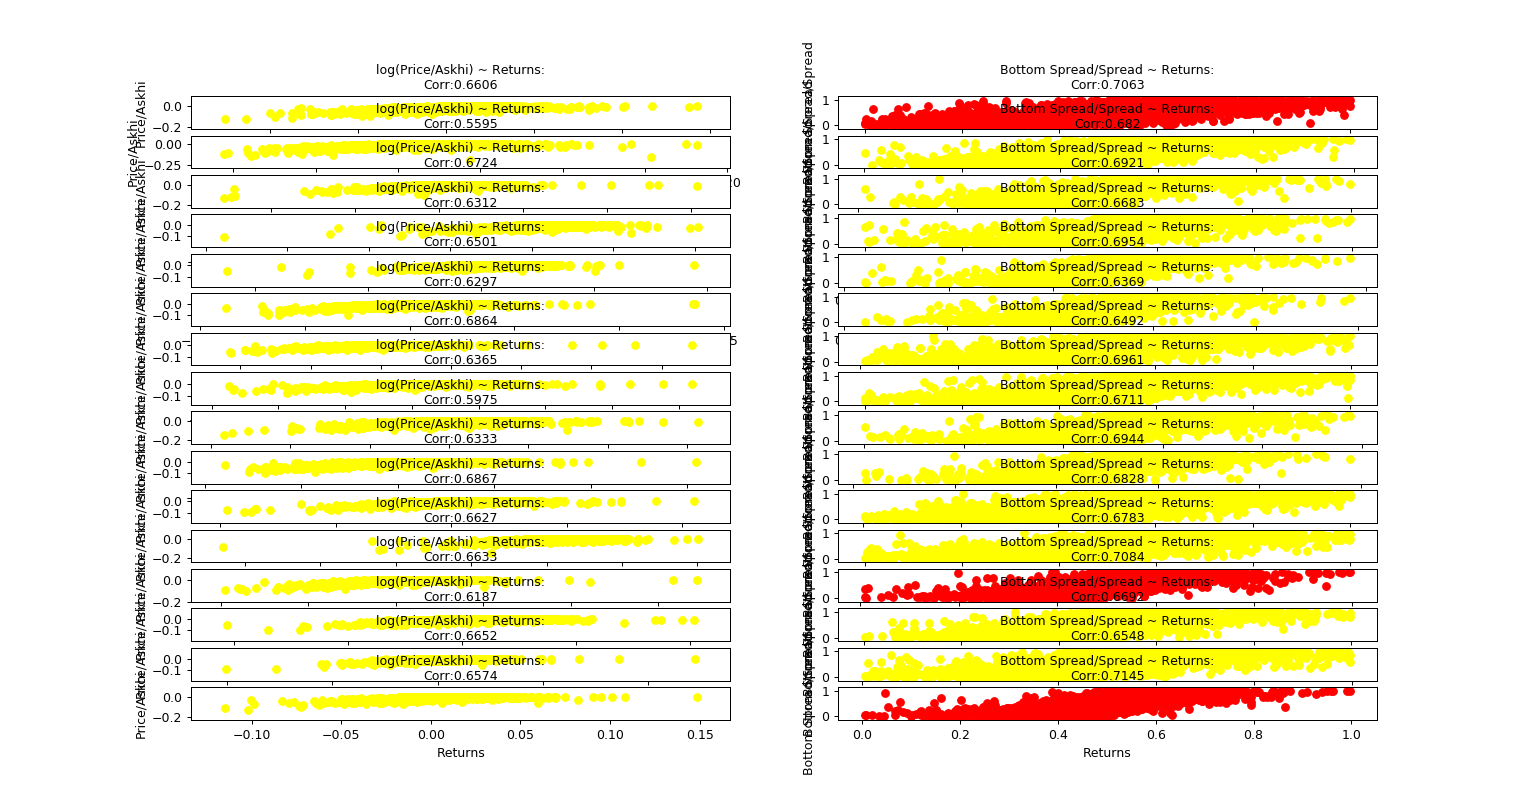



Batch 2


<IPython.core.display.Javascript object>


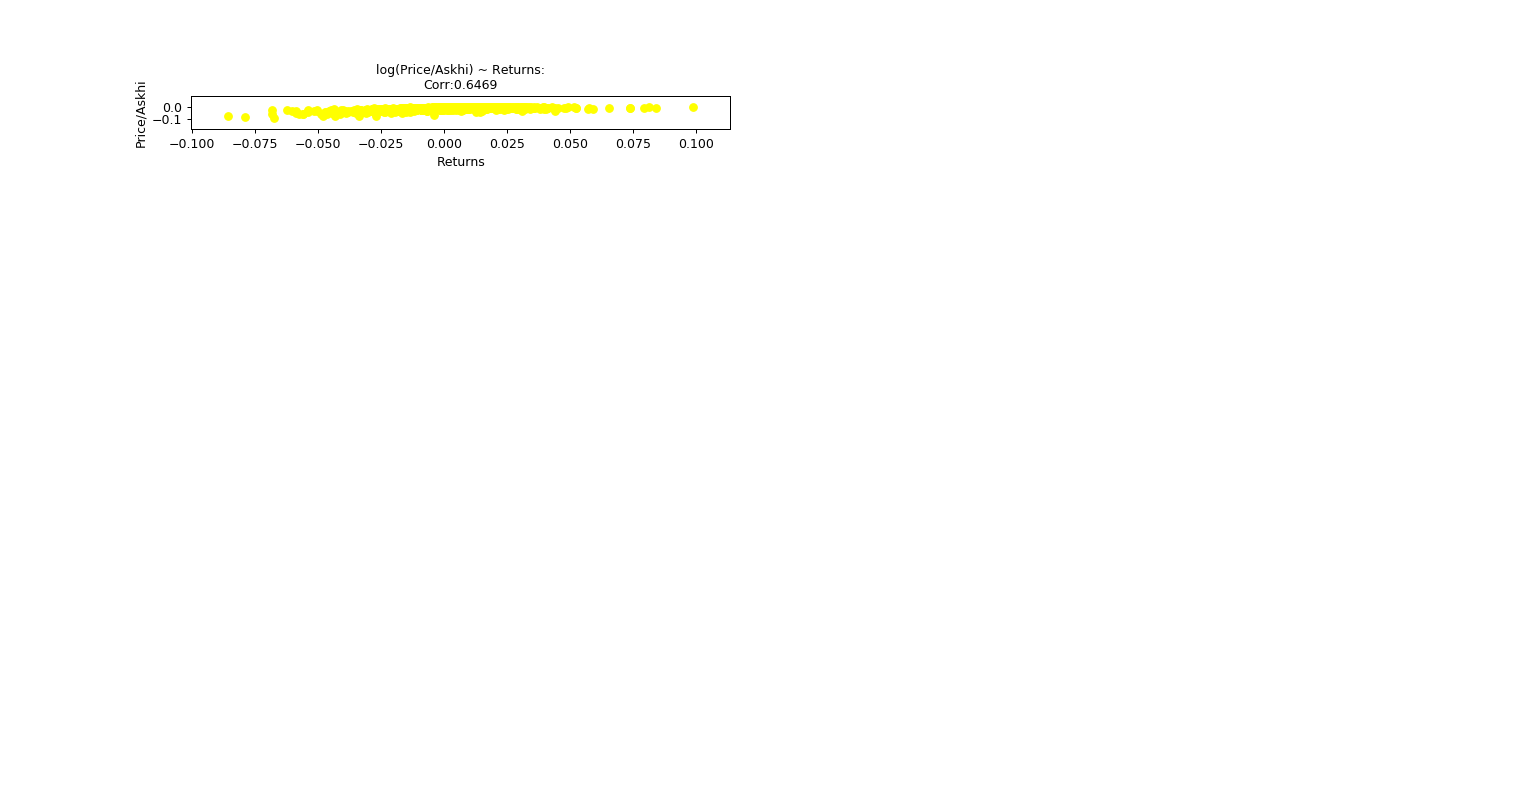



Batch 3


<IPython.core.display.Javascript object>


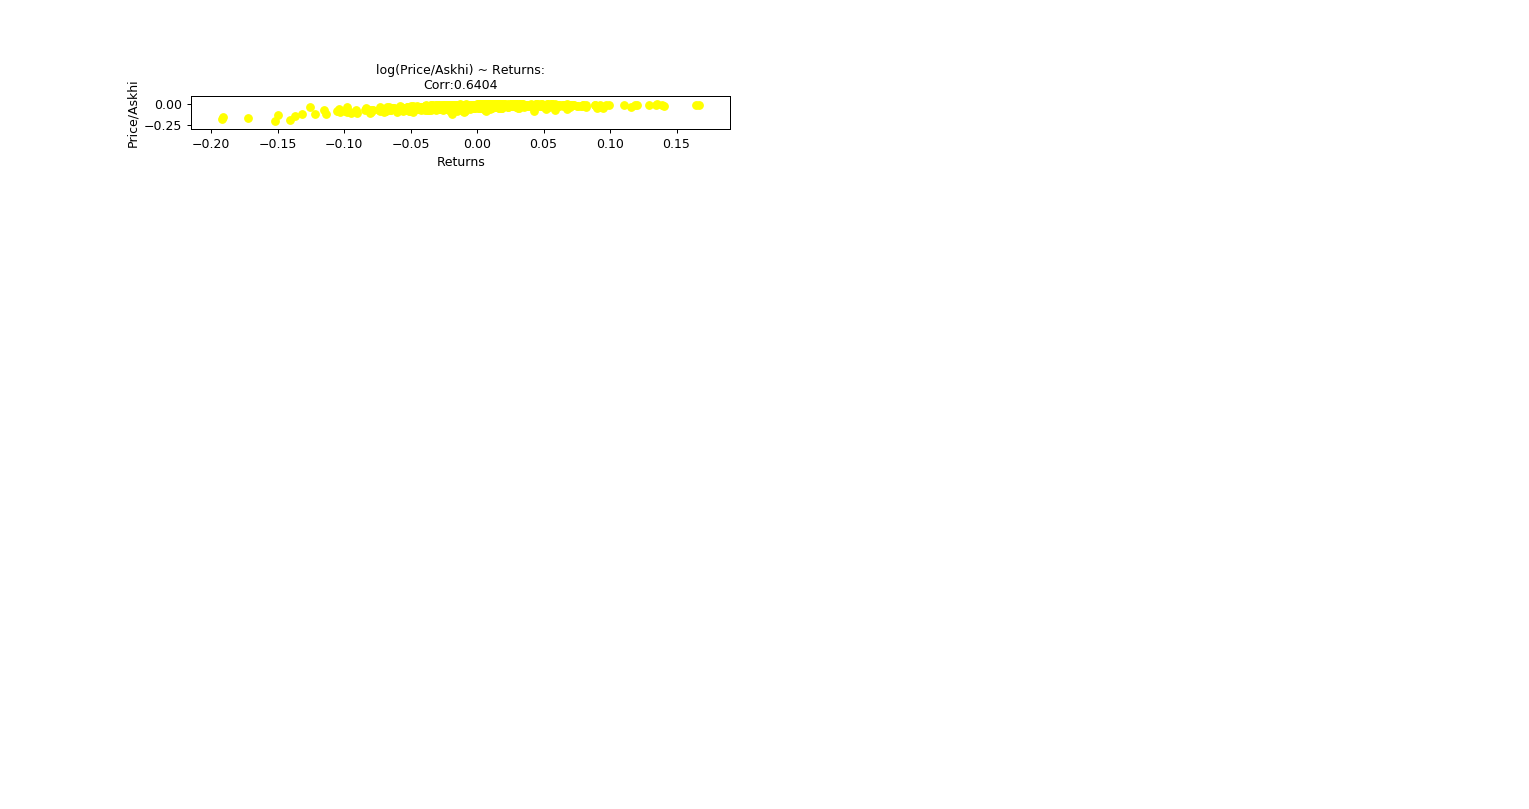



Batch 4


<IPython.core.display.Javascript object>


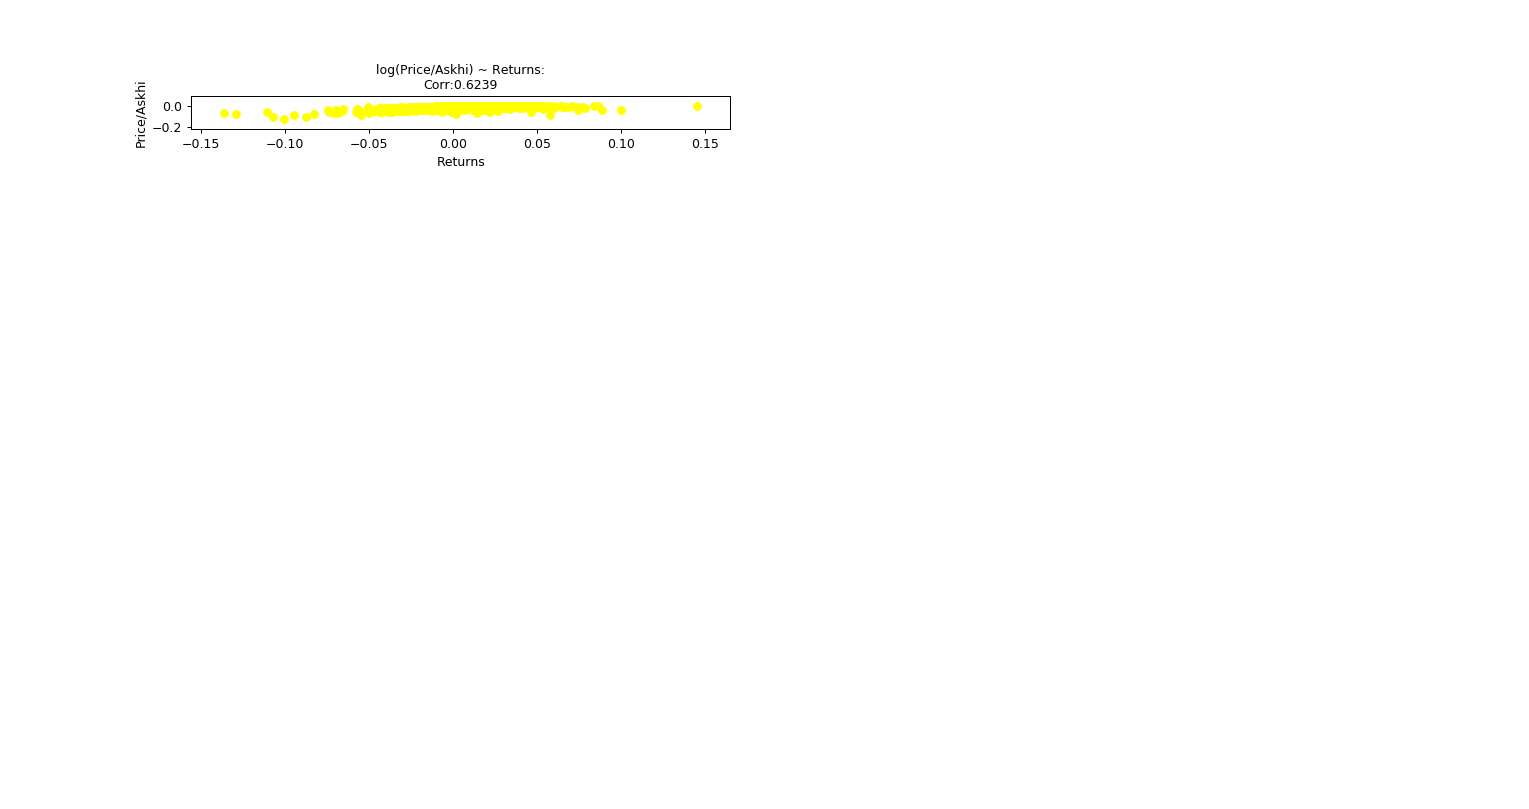



Batch 5


<IPython.core.display.Javascript object>


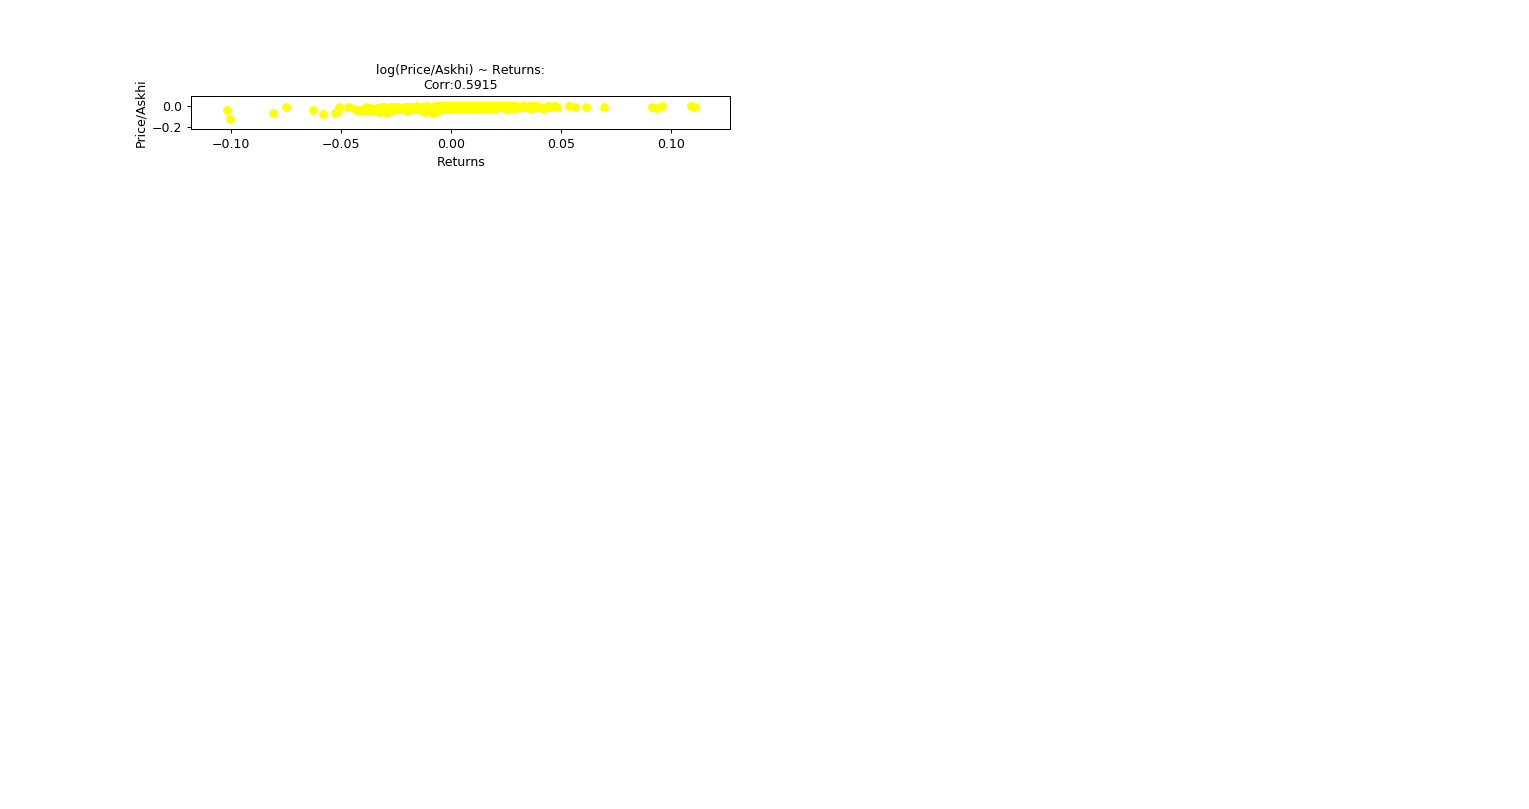



Batch 6


<IPython.core.display.Javascript object>


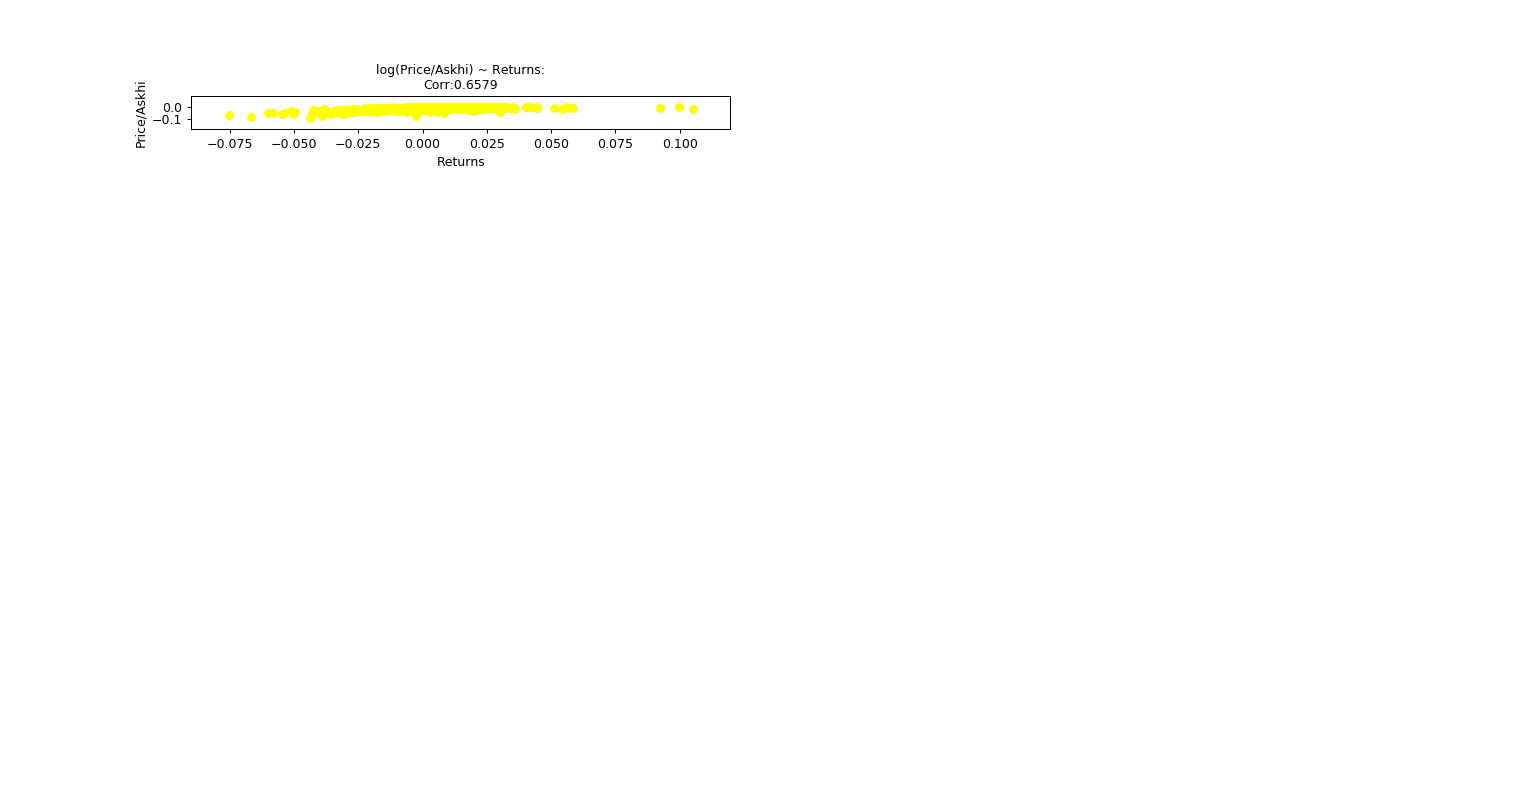



Batch 7


<IPython.core.display.Javascript object>


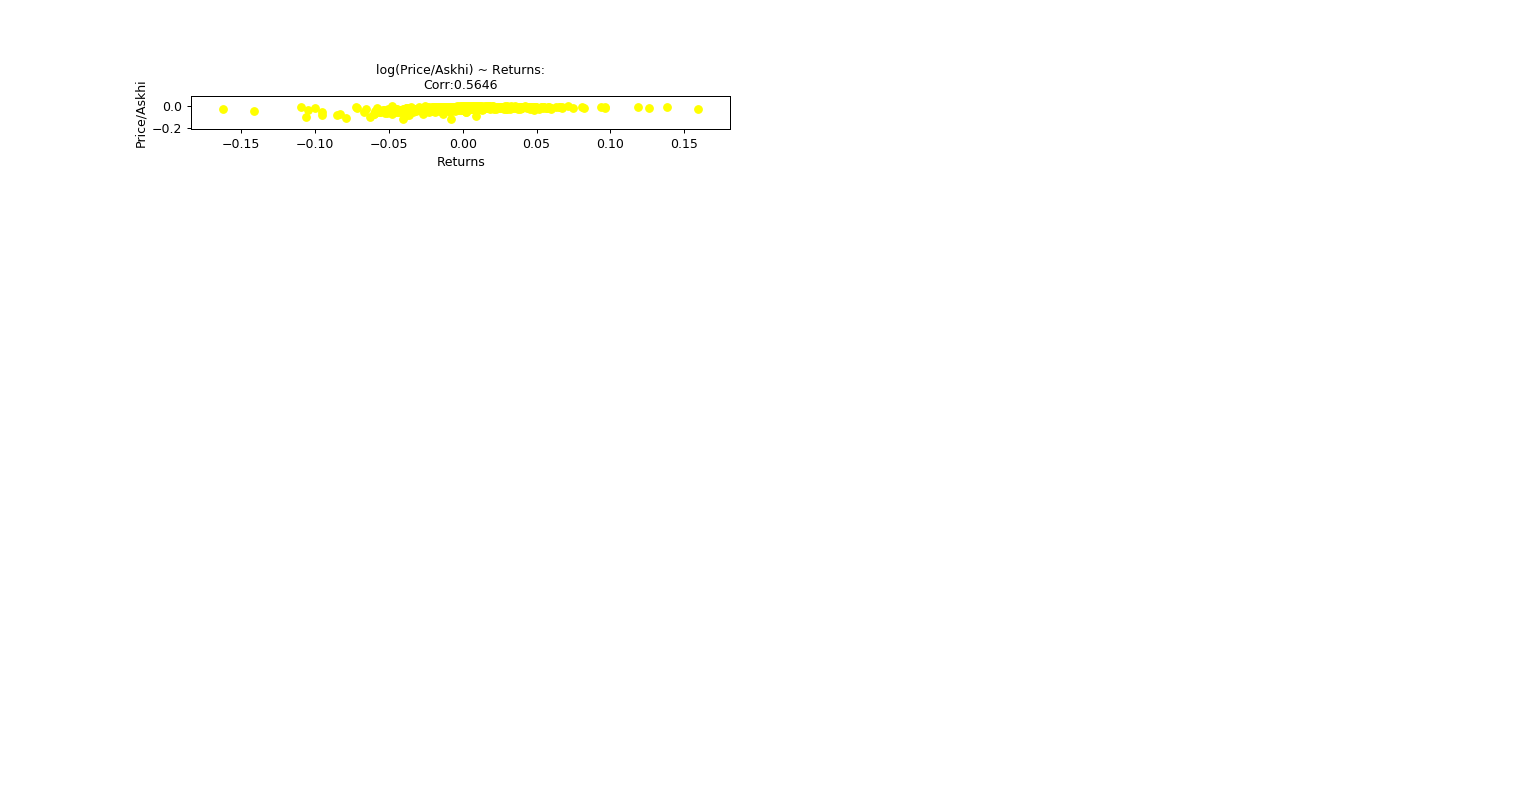



Batch 8


<IPython.core.display.Javascript object>


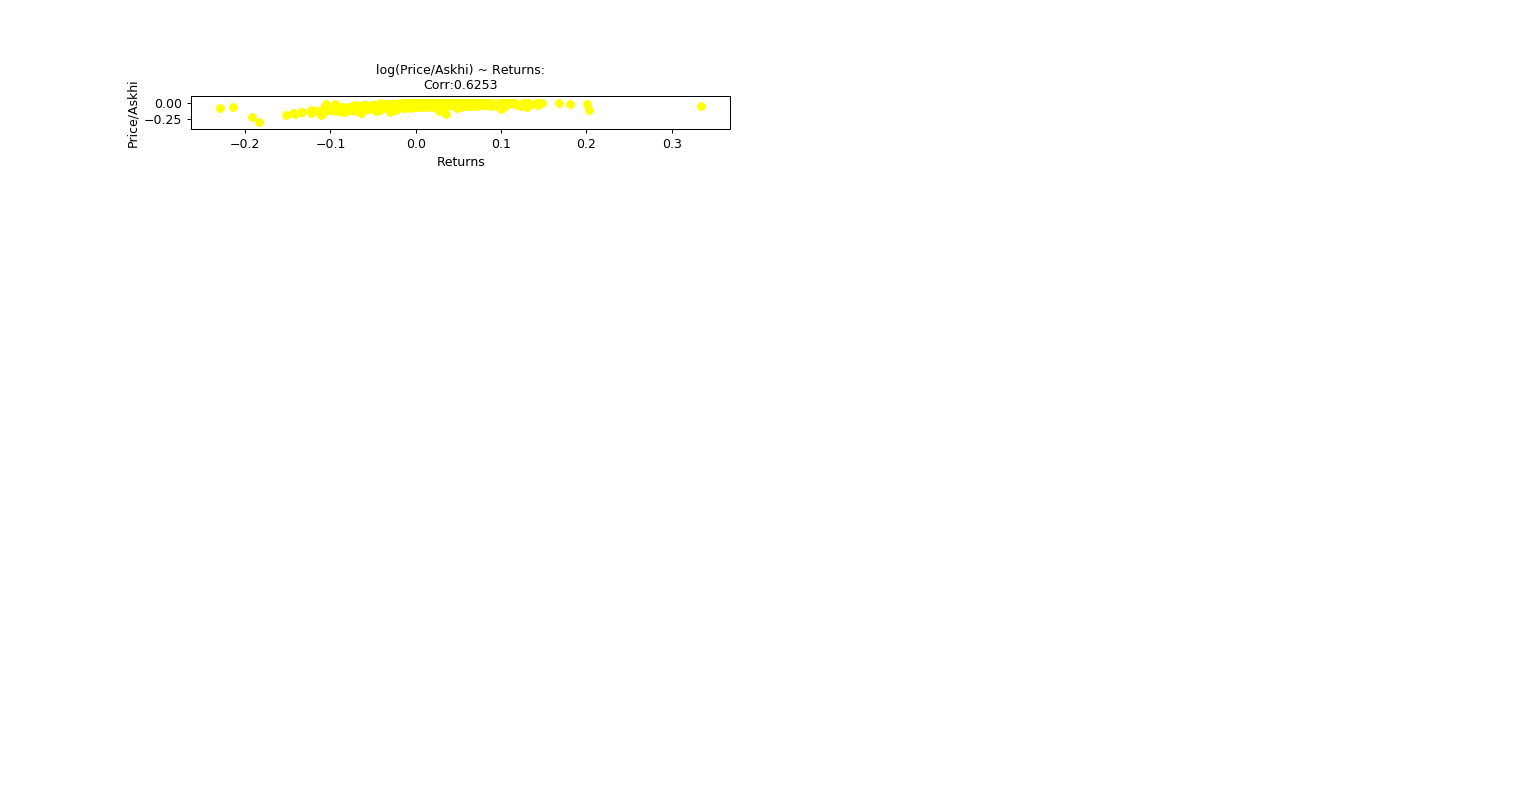



Batch 9


<IPython.core.display.Javascript object>


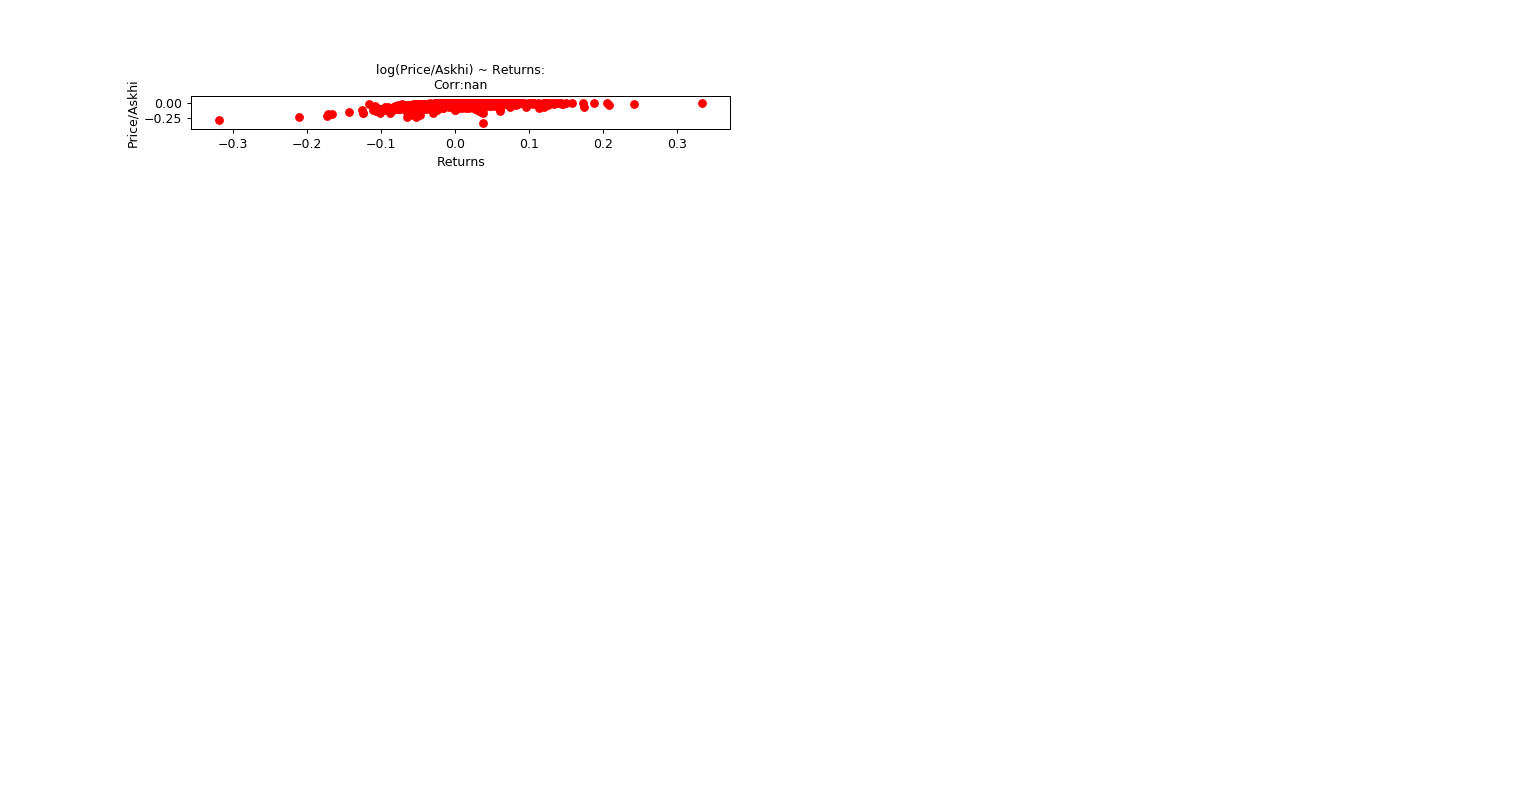



Batch 10


C:\PROGRA1\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<IPython.core.display.Javascript object>


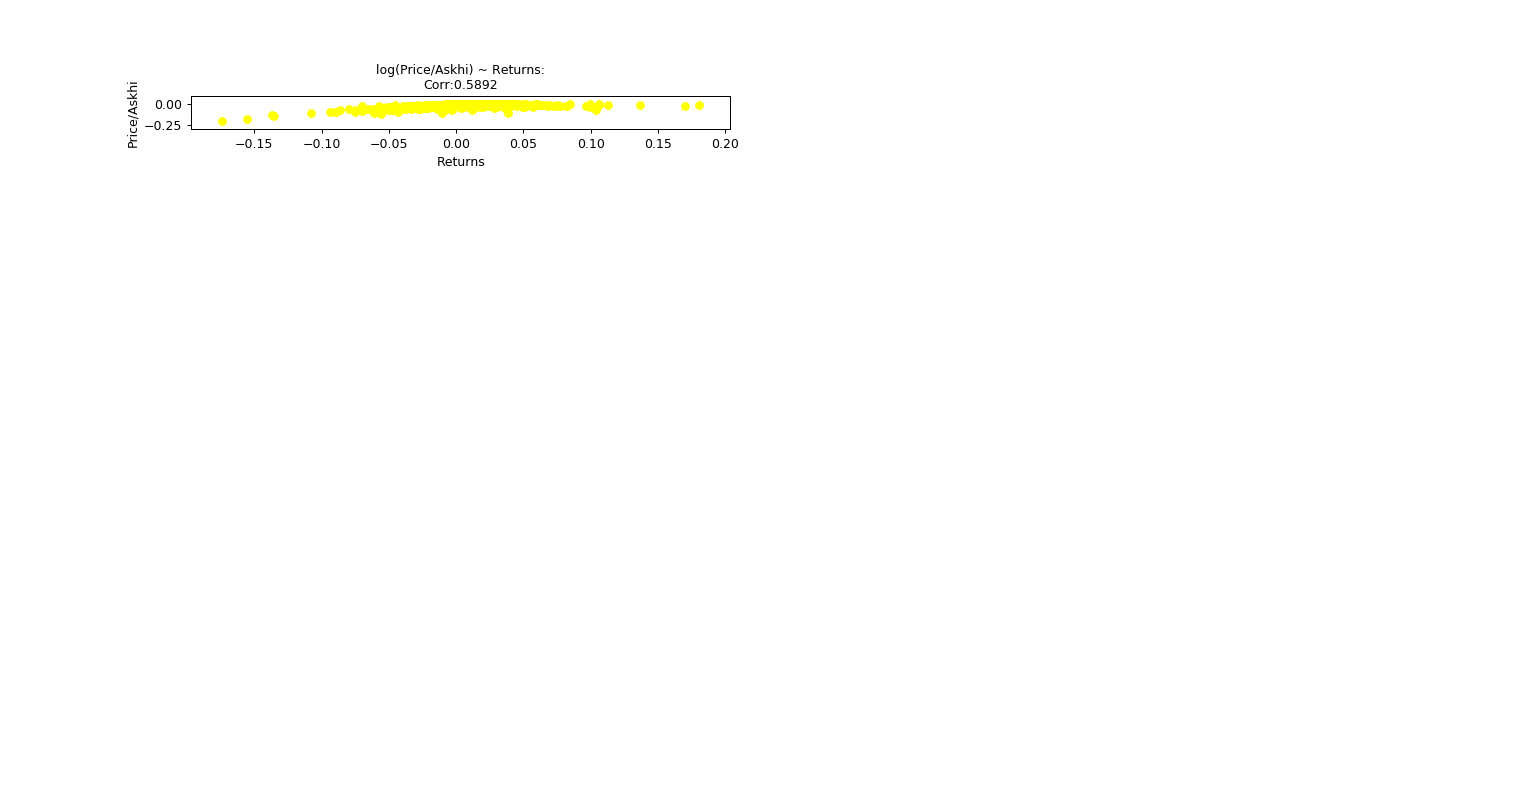



Batch 11


<IPython.core.display.Javascript object>


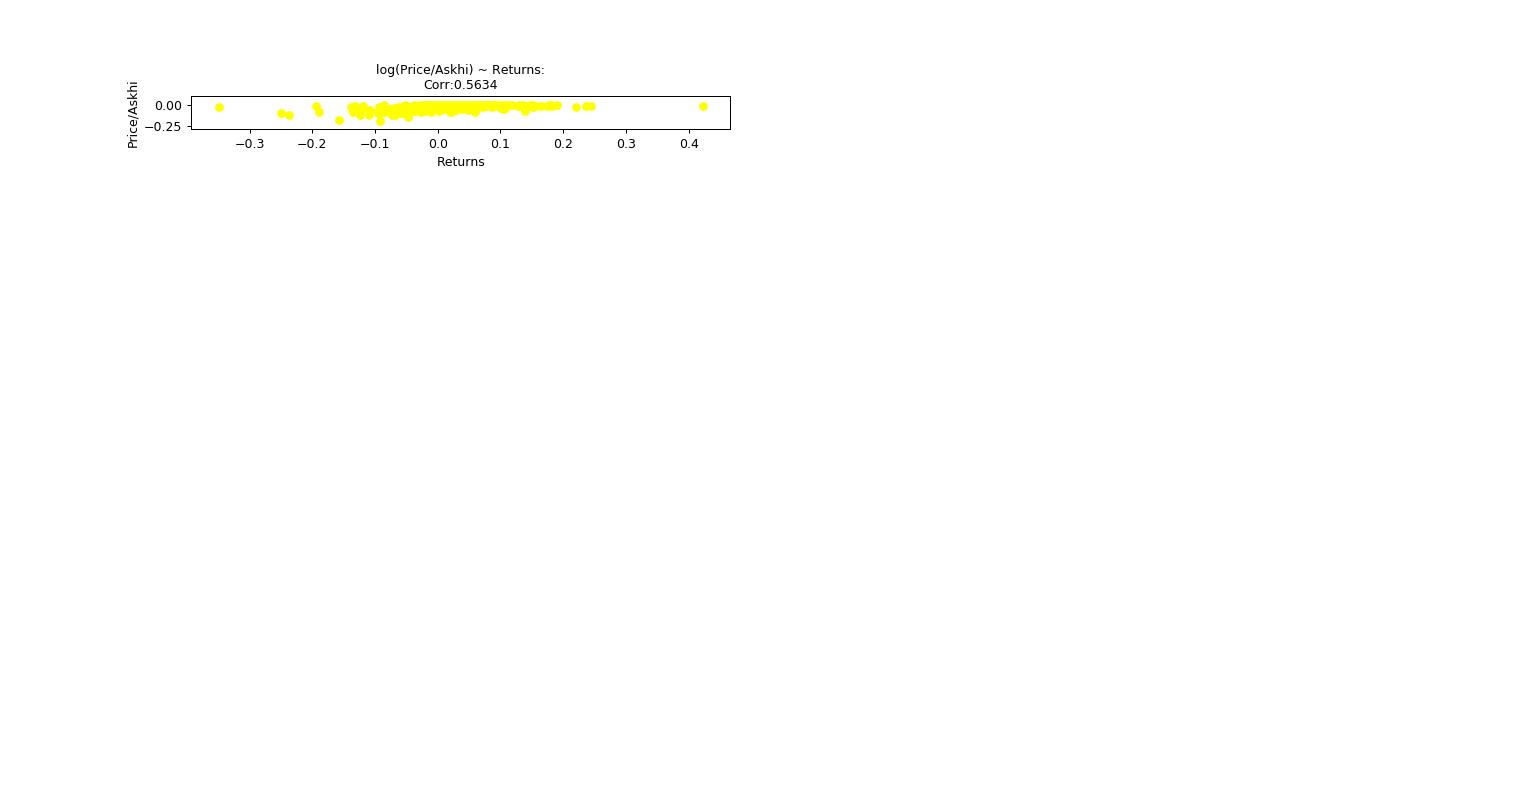

In [50]:
#sup_title_font =15
sub_title_font =10
title_font = 10
legend_font =8
axis_font = 10
tick_rotation = 20
black_dot = 2
red_dot = 5


### matrix of subplots
n_cols = 2
n_rows = 16
n_plots = n_rows*n_cols
nloops = int(np.floor(388/n_rows))
#temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_price.columns)
    lower = i*n_rows
    upper = (i+1)*n_rows
    #print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    print('\n\nBatch {}'.format(i))   
    #####-----------######
    plt.figure(figsize=(17,9))
    for k in range(n_rows):
        symbol = temp_list[k]
        fig = plt.subplot(n_rows,n_cols,k+1)          
        ##--WITH THE RETURNS--#
        sig6 = 1/(1+np.exp(-40*df_returns[symbol]))
        temp_cor4 = round(np.corrcoef(df_returns[symbol], np.log(df_price_askhi[symbol]))[0][1], 4)
        temp_cor6 = round(np.corrcoef(sig6, df_pbs[symbol])[0][1], 4)

        corr_list = [temp_cor4, temp_cor6]
        color_list = []

        for corr_value in corr_list:
            temp_value = np.abs(corr_value)
            if temp_value <= 0.4:
                color_list.append('blue')
            elif temp_value <= 0.7: 
                color_list.append('yellow')
            else:
                color_list.append('red')


            ##---#########----BEGIN PLOTTING---#########--##       
            #####
            ##########--------CORRELATE WITH RETURNS---------##############
        #########
        if k%2==0:
            ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
            plt.scatter(df_returns[symbol], np.log(df_price_askhi[symbol]), color = color_list[0])
            plt.title('log(Price/Askhi) ~ Returns:\nCorr:{}'.format(temp_cor4), fontsize = title_font)
            plt.xlabel('Returns', fontsize=axis_font)
            plt.ylabel('Price/Askhi', fontsize=axis_font)
#             ax[k,l].spines['top'].set_visible(False)
#             ax[k,l].spines['right'].set_visible(False)

        elif k%2==1:
            ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
            plt.scatter(sig6, df_pbs[symbol], color = color_list[1])
            plt.title('Bottom Spread/Spread ~ Returns:\nCorr:{}'.format(temp_cor6), fontsize = title_font)
            plt.xlabel('Returns', fontsize=axis_font)
            plt.ylabel('Bottom Spread/Spread', fontsize=axis_font)
#             ax[k,l].spines['top'].set_visible(False)
#             ax[k,l].spines['right'].set_visible(False)

#        fig.subplots_adjust(hspace=0.7, top=5)
#        fig.suptitle('{}'.format(symbol), verticalalignment='top')
        ### left, bottom, right, top proportions
#        fig.tight_layout(rect=[0, 0.1, 1.0, 0.95])
        plt.show()
        break
        if i > 1:
            break

### TRY CORRELATING WITH THE RETURNS

### Log transformation

In [23]:
# #sup_title_font =15
# sub_title_font =10
# legend_font =8
# axis_font = 10
# tick_rotation = 20
# black_dot = 2
# red_dot = 5

# ### matrix of subplots
# n_cols = 3
# n_rows = 1
# n_plots = n_cols*n_rows
# nloops = int(np.floor(388/n_plots))
# temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

# symbol = 'ORCL_ORACLE CORP'


# ###----Generate Correlations----####
# ##-------Try with the Logrithms----###

# temp_cor1 = round(np.corrcoef(np.log(df_price_askhi[symbol]), df_spread_askhi[symbol])[0][1], 4)
# temp_cor2 = round(np.corrcoef(np.log(df_price_askhi[symbol]), df_pbs[symbol])[0][1], 4)
# temp_cor3 = round(np.corrcoef(df_spread_askhi[symbol], df_pbs[symbol])[0][1], 4)


# ##---#########----BEGIN PLOTTING---#########--##
# fig, (ax1, ax2, ax3) = plt.subplots(n_rows,n_cols, figsize=(12,4))

# ###-----PRICE/ASKHI ~~ SPREAD/ASKHI SCATTER--------#####
# ax1.scatter(np.log(df_price_askhi[symbol]), df_spread_askhi[symbol])
# ax1.set_title('Price/Askhi ~ Spread/Askhi:\nCorr:{}'.format(temp_cor1), fontsize = title_font)
# ax1.set_xlabel('Price/Askhi', fontsize=axis_font)
# ax1.set_ylabel('Spread/Askhi', fontsize=axis_font)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)


# ###-----PRICE/ASKHI ~~ (PRICE-BIDLO)/ASKHI SCATTER--------#####
# ax2.scatter(np.log(df_price_askhi[symbol]), np.log(df_pbs[symbol]))
# ax2.set_title('Price/Askhi ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor2), fontsize = title_font)
# ax2.set_xlabel('Price/Askhi', fontsize=axis_font)
# ax2.set_ylabel('Bottm Spread/Spread', fontsize=axis_font)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)


# ###-----SPREAD/ASKHI ~~ (PRICE-BIDLO)/SPREAD SCATTER--------#####
# ax3.scatter(df_spread_askhi[symbol], df_pbs[symbol])
# ax3.set_title('Spread/Askhi ~ Bottom Spread/Spread:\nCorr:{}'.format(temp_cor3), fontsize = title_font)
# ax3.set_xlabel('Spread/Askhi', fontsize=axis_font)
# ax3.set_ylabel('Bottom Spread/Spread', fontsize=axis_font)
# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)



# fig.subplots_adjust(hspace=0.7, top=5)
# fig.suptitle('{}'.format(symbol), verticalalignment='top')
# ### left, bottom, right, top proportions
# fig.tight_layout(rect=[0, 0.1, 1.0, 0.95])
# plt.show()

### Break up into Dates Category (ie worst return dates)

In [24]:
# plt.plot(df_askhi['ORCL_ORACLE CORP'], label='askhi')
# plt.plot(df_price['ORCL_ORACLE CORP'], label='price')
# plt.plot(df_bidlo['ORCL_ORACLE CORP'], label='bidlo')
# plt.legend()